# Appendix 2. Exposure

# Code setup

In [8]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# LAU map plotting

Output directory already exists.


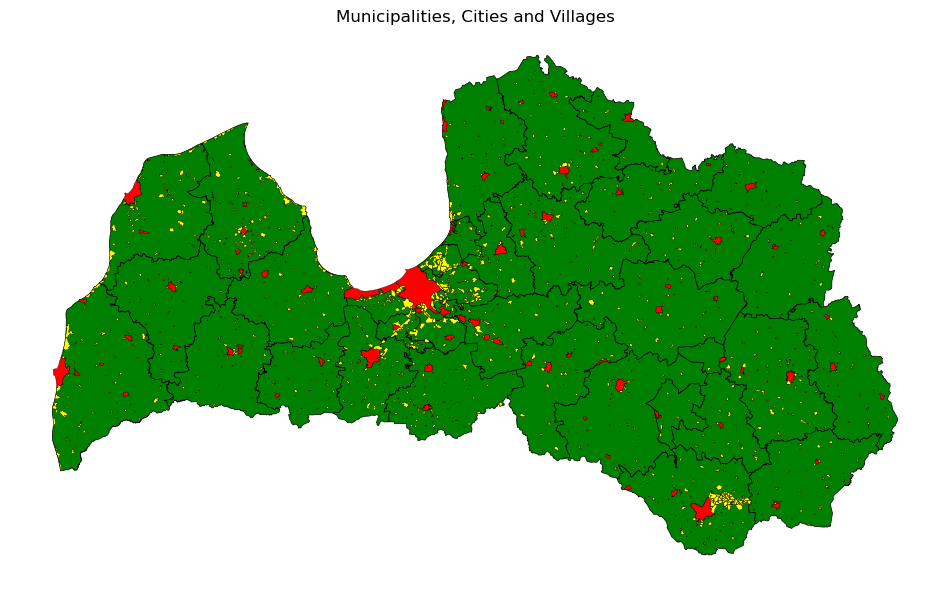

In [13]:
# Relative paths from the notebook's directory
municipalities_path = os.path.join("input files", "Administrative territories", "novadi", "Novadi.shp")
cities_path = os.path.join("input files", "Administrative territories", "pilsetas", "Pilsetas.shp")
villages_path = os.path.join("input files", "Administrative territories", "ciemi", "Ciemi.shp")

# Checking if the paths exist
for path in [municipalities_path, cities_path, villages_path]:
    if not os.path.exists(path):
        raise FileNotFoundError(f"The required file does not exist: {path}")

# Checking if an output directory exists, and if not, create it
output_dir = os.path.join("output")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print("Output directory created.")
else:
    print("Output directory already exists.")
    
#Opening Latvia's regions map
municipalities = gpd.read_file(municipalities_path)
cities = gpd.read_file(cities_path)
villages = gpd.read_file(villages_path)

# Plotting the shapefiles
fig, ax = plt.subplots(figsize=(12, 12))

municipalities.plot(ax=ax, facecolor='green', edgecolor='k', linewidth=0.5)
cities.plot(ax=ax, facecolor='red', edgecolor='k', linewidth=0.25)
villages.plot(ax=ax, facecolor='yellow', edgecolor='k', linewidth=0.25)
ax.set_title("Municipalities, Cities and Villages")
ax.set_axis_off()

plt.show()



# Calculate areas

In [14]:
#creating unique values for ciemi and pilsetas

#display(villages)
#display(cities)

# Creating unique values for 'cities'
cities = cities.copy()
cities['unique_values'] = range(1, len(cities) + 1)

# Creating unique values for 'ciemi'
# Starting where 'pilsetas' left off
villages = villages.copy()
villages['unique_values'] = range(len(cities) + 1, len(cities) + len(villages) + 1)

In [16]:
#NOVADI
# Create a new column "Area" which is the area of the geometry
municipalities = municipalities.copy()
municipalities['Area'] = municipalities['geometry'].area

#To convert to square kilometers, divide by 1e6 (since 1 km^2 = 1,000,000 m^2)
municipalities['Area'] = municipalities['Area'] / 1e6


#CITIES
# Create a new column "Area" which is the area of the geometry
cities['Area'] =cities['geometry'].area

# To convert to square kilometers, divide by 1e6 (since 1 km^2 = 1,000,000 m^2)
cities['Area'] = cities['Area'] / 1e6


#VILLAGES
# Create a new column "Area" which is the area of the geometry
villages['Area'] = villages['geometry'].area

# To convert to square kilometers, divide by 1e6 (since 1 km^2 = 1,000,000 m^2)
villages['Area'] = villages['Area'] / 1e6

**Joining cities and municipalities shape files with georeferencing to know which cities belong to which municipalites**

In [20]:
# The new column in the dataframe will be called "city in municipality"
# Performing a spatial join between the two GeoDataFrames
city_in_municipality = gpd.sjoin(cities, municipalities, how='inner', predicate='within')
display(city_in_municipality.columns)

Index(['CODE_left', 'CITY_TYPE', 'CREATED_US_left', 'CREATED_DA_left',
       'LAST_EDITE_left', 'LAST_EDI_1_left', 'LABEL_left', 'GLOBALID_left',
       'ATVK_left', 'TID_left', 'GEOM_AREA_left', 'GEOM_LEN_left',
       'SHAPE_AREA_left', 'SHAPE_LEN_left', 'geometry', 'unique_values',
       'Area_left', 'index_right', 'CODE_right', 'CREATED_US_right',
       'CREATED_DA_right', 'LAST_EDITE_right', 'LAST_EDI_1_right',
       'LABEL_right', 'GLOBALID_right', 'ATVK_right', 'TID_right',
       'GEOM_AREA_right', 'GEOM_LEN_right', 'SHAPE_AREA_right',
       'SHAPE_LEN_right', 'Area_right'],
      dtype='object')

In [22]:
# Creating a new dataframe with only the relevant columns
city_in_municipality_label = city_in_municipality[['LABEL_right', 'LABEL_left','unique_values']].copy()

# Drop any duplicates
# Pilseta_in_novads_label.drop_duplicates(inplace=True)

# Rename the columns to something more descriptive
city_in_municipality_label.columns = ['Municipality', 'LABEL', 'unique_values']

display(city_in_municipality_label)

,Municipality,LABEL,unique_values
0,Siguldas nov.,Sigulda,1
1,Krāslavas nov.,Krāslava,2
2,Ogres nov.,Lielvārde,3
3,Bauskas nov.,Iecava,4
4,Alūksnes nov.,Alūksne,5
...,...,...,...
72,Smiltenes nov.,Ape,73
73,Ludzas nov.,Kārsava,74
75,Olaines nov.,Olaine,76
76,Balvu nov.,Viļaka,77


**Joining ciemi and novadi shape files with georeferencing to know which rural villages belong to which LAU regions**

In [23]:
# The new column i the dataframe will be called "village in municipality"
# Performing a spatial join between the two GeoDataFrames of municipalities and villages

village_in_municipality = gpd.sjoin(villages, municipalities, how='inner', predicate='within')
display(village_in_municipality.columns)

# Create a new dataframe with only the relevant columns
village_in_municipality_label = village_in_municipality[['LABEL_right', 'LABEL_left', 'unique_values']].copy()

# Renaming the columns to something more descriptive
village_in_municipality_label.columns = ['Municipality', 'LABEL', 'unique_values']

display(village_in_municipality_label)

Index(['CODE_left', 'CREATED_US_left', 'CREATED_DA_left', 'LAST_EDITE_left',
       'LAST_EDI_1_left', 'LABEL_left', 'GLOBALID_left', 'TID_left',
       'GEOM_AREA_left', 'GEOM_LEN_left', 'SHAPE_AREA_left', 'SHAPE_LEN_left',
       'geometry', 'unique_values', 'Area_left', 'index_right', 'CODE_right',
       'CREATED_US_right', 'CREATED_DA_right', 'LAST_EDITE_right',
       'LAST_EDI_1_right', 'LABEL_right', 'GLOBALID_right', 'ATVK',
       'TID_right', 'GEOM_AREA_right', 'GEOM_LEN_right', 'SHAPE_AREA_right',
       'SHAPE_LEN_right', 'Area_right'],
      dtype='object')

,Municipality,LABEL,unique_values
0,Valmieras nov.,Ipiķi,79
1,Madonas nov.,Sauleskalns,80
2,Ogres nov.,Ogresgals,81
3,Tukuma nov.,Ezernieki,82
4,Olaines nov.,Medemciems,83
...,...,...,...
1373,Saulkrastu nov.,Gaisma,1452
1374,Augšdaugavas nov.,Krīvāni,1453
1375,Ogres nov.,Taurupe,1454
1376,Balvu nov.,Šķilbani,1455


# IN PROGRESS